In [11]:
from hockey_rink import NHLRink, RinkImage
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [12]:
goal_location_df = "C:\\Users\\Karoline Sears\\Documents\\GitHub\\hockey-streamlit\\data\\goal_locations.csv"
goal_location_df = pd.read_csv(goal_location_df)

goal_location_df.head()

,jersey_number,player_id,player_name,position,team_name,eventIdx,period,x,y
0,9,8480113,Alex Iafallo,Left Wing,Winnipeg Jets,194,2,-76.0,5.0
1,15,8481618,Alex Newhook,Center,Montréal Canadiens,110,2,-85.0,-9.0
2,15,8481618,Alex Newhook,Center,Montréal Canadiens,243,3,71.0,-1.0
3,88,8478233,Andrew Mangiapane,Left Wing,Calgary Flames,84,1,-74.0,7.0
4,88,8478233,Andrew Mangiapane,Left Wing,Calgary Flames,344,3,-65.0,7.0


In [13]:
# running count of goal number for each player - make sure this is ordered by game id and time in period
goal_counts = goal_location_df
goal_counts["goal_no"] = goal_counts.groupby("player_id").cumcount() + 1
goal_counts.head()

,jersey_number,player_id,player_name,position,team_name,eventIdx,period,x,y,goal_no
0,9,8480113,Alex Iafallo,Left Wing,Winnipeg Jets,194,2,-76.0,5.0,1
1,15,8481618,Alex Newhook,Center,Montréal Canadiens,110,2,-85.0,-9.0,1
2,15,8481618,Alex Newhook,Center,Montréal Canadiens,243,3,71.0,-1.0,2
3,88,8478233,Andrew Mangiapane,Left Wing,Calgary Flames,84,1,-74.0,7.0,1
4,88,8478233,Andrew Mangiapane,Left Wing,Calgary Flames,344,3,-65.0,7.0,2


In [14]:
def adjust_coordinates(row):
    x = row["x"]
    y = row["y"]
    if x < 0:
        adj_x = abs(x)
        adj_y = -y
    else:
        adj_x = x
        adj_y = y
    return pd.Series({"x_adjusted": adj_x, "y_adjusted": adj_y})


# Apply the function to each row of the DataFrame
goal_counts[["x_adjusted", "y_adjusted"]] = goal_counts.apply(
    adjust_coordinates, axis=1
)
ice_map_data = goal_counts
ice_map_data.head()

,jersey_number,player_id,player_name,position,team_name,eventIdx,period,x,y,goal_no,x_adjusted,y_adjusted
0,9,8480113,Alex Iafallo,Left Wing,Winnipeg Jets,194,2,-76.0,5.0,1,76.0,-5.0
1,15,8481618,Alex Newhook,Center,Montréal Canadiens,110,2,-85.0,-9.0,1,85.0,9.0
2,15,8481618,Alex Newhook,Center,Montréal Canadiens,243,3,71.0,-1.0,2,71.0,-1.0
3,88,8478233,Andrew Mangiapane,Left Wing,Calgary Flames,84,1,-74.0,7.0,1,74.0,-7.0
4,88,8478233,Andrew Mangiapane,Left Wing,Calgary Flames,344,3,-65.0,7.0,2,65.0,-7.0


In [15]:
# upload this new calculation to github
file_path = "C:\\Users\\Karoline Sears\\Documents\\GitHub\\hockey-streamlit\\data\\ice_map_data.csv"
ice_map_data.to_csv(file_path, index=False, encoding="utf-8")

In [4]:
# for home and away games eventually
# cond_list_home = [pasta_goals['isHomeTeam'] == 1.0, pasta_goals['isHomeTeam'] == 0.0]
# choice_list_home = [1, 0]

# cond_list_away = [pasta_goals['isHomeTeam'] == 0.0, pasta_goals['isHomeTeam'] == 1.0]
# choice_list_away = [1, 0]

# cond_list_zone = [pasta_goals['location'] == "HOMEZONE", pasta_goals['location'] != "HOMEZONE"]
# choice_list_zone = [0, 1]

# pasta_goals['home'] =  np.select(cond_list_home, choice_list_home)
# pasta_goals['away'] =  np.select(cond_list_away, choice_list_away)
# pasta_goals['zone'] = np.select(cond_list_zone, choice_list_zone)
# pasta_goals.head()

In [5]:
# shot types eventually
# pasta_goals['shotType'].value_counts()

In [6]:
# home = pasta_goals.query('home ==1')
# away = pasta_goals.query('away == 1')

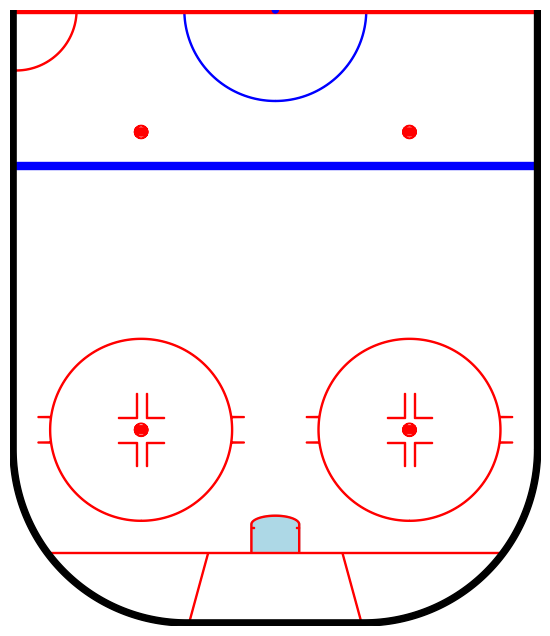

In [9]:
# Heatmap version
fig, axs = plt.subplots(1, figsize=(18, 8))
player_goals = goal_counts.query("player_id == 8479542")

rink = NHLRink(rotation=270, net={"visible": False})

rink.heatmap(
    "x_adjusted",
    "y_adjusted",
    data=player_goals,
    draw_kw={"display_range": "half"},
)

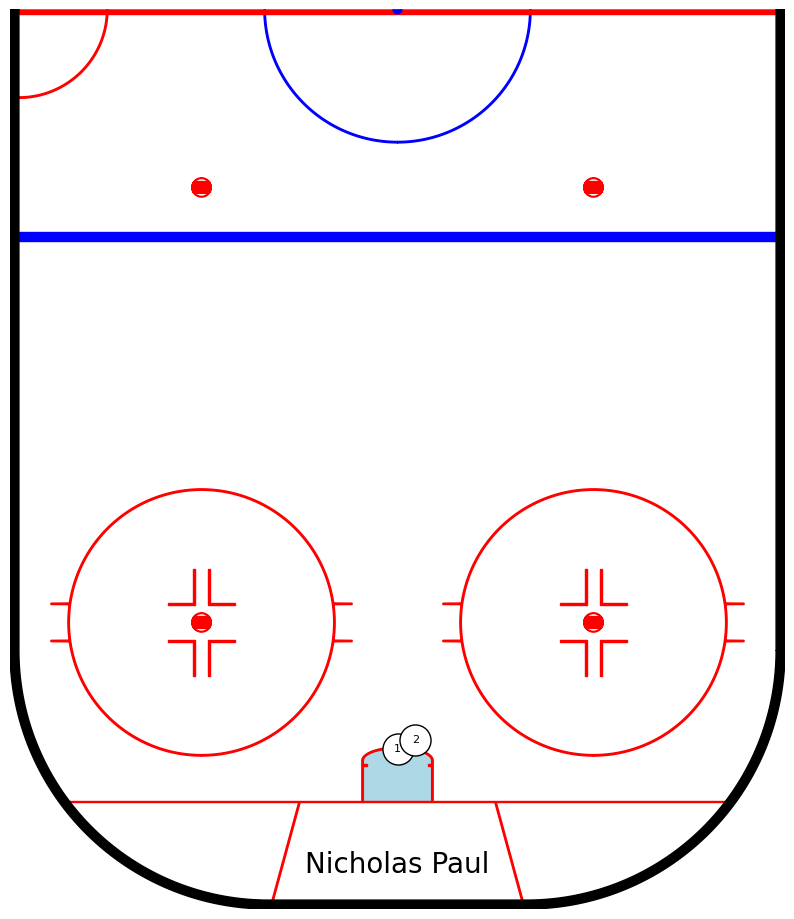

In [11]:
player_goals = goal_counts.query("player_id == 8477426")

player_name = player_goals["player_name"]

goals = player_goals.assign(
    x=np.abs(player_goals.x_adjusted),
    y=player_goals.y_adjusted * np.sign(player_goals.x_adjusted),
)

rink = NHLRink(rotation=270, net={"visible": False})

fig, ax = plt.subplots(1, 1, figsize=(10, 20))

# Draw the rink on the single Axes object
rink.draw(display_range="half", ax=ax)

# Scatter plot for goals
rink.scatter(
    "x_adjusted",
    "y_adjusted",
    ax=ax,
    facecolor="white",
    edgecolor="black",
    s=500,
    data=goals,
)

# Add text for goal numbers
rink.text(
    "x_adjusted",
    "y_adjusted",
    "goal_no",
    ax=ax,
    ha="center",
    va="center",
    fontsize=8,
    data=goals,
)

# Additional Test
location_texth = rink.text(
    0.5,
    0.05,
    player_name,
    ax=ax,
    use_rink_coordinates=False,
    ha="center",
    va="center",
    fontsize=20,
)


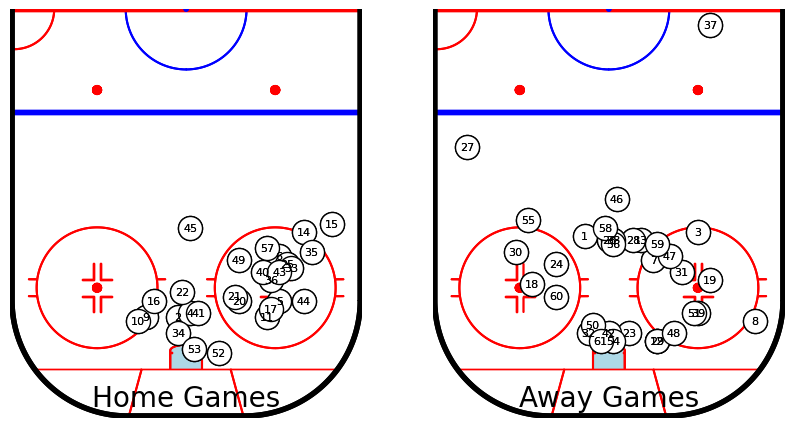

In [39]:
# grid code sourced from https://github.com/the-bucketless/hockey_rink
# raw data sourced from moneypuck.com

home_goals = pasta_goals.assign(
    home=pasta_goals.home == 1,
    x=np.abs(pasta_goals.xCordAdjusted),
    y=pasta_goals.yCordAdjusted * np.sign(pasta_goals.xCordAdjusted),
)

away_goals = pasta_goals.assign(
    away=pasta_goals.home != 1,
    x=np.abs(pasta_goals.xCordAdjusted),
    y=pasta_goals.yCordAdjusted * np.sign(pasta_goals.xCordAdjusted),
)

rink = NHLRink(rotation=270, net={"visible": False})

fig, axs = plt.subplots(1, 2, figsize=(10, 20))

# home
# plt.subplot(1, 2,1)
for ax in axs:
    rink.draw(display_range="half", ax=axs[0])

    rink.scatter(
        "xCordAdjusted",
        "yCordAdjusted",
        ax=axs[0],
        facecolor="white",
        edgecolor="black",
        s=300,
        data=home,
    )

    rink.text(
        "xCordAdjusted",
        "yCordAdjusted",
        "goal_no",
        ax=axs[0],
        ha="center",
        va="center",
        fontsize=8,
        data=home,
    )

location_texth = rink.text(
    0.5,
    0.05,
    "Home Games",
    ax=axs[0],
    use_rink_coordinates=False,
    ha="center",
    va="center",
    fontsize=20,
)

# away
# plt.subplot(1, 2,2)
for ax in axs:
    rink.draw(display_range="half", ax=axs[1])

    rink.scatter(
        "xCordAdjusted",
        "yCordAdjusted",
        ax=axs[1],
        facecolor="white",
        edgecolor="black",
        s=300,
        data=away,
    )

    rink.text(
        "xCordAdjusted",
        "yCordAdjusted",
        "goal_no",
        ax=axs[1],
        ha="center",
        va="center",
        fontsize=8,
        data=away,
    )

location_text = rink.text(
    0.5,
    0.05,
    "Away Games",
    ax=axs[1],
    use_rink_coordinates=False,
    ha="center",
    va="center",
    fontsize=20,
)

In [40]:
pasta_goals["shotType"].value_counts()

WRIST    29
SNAP     14
SLAP     13
BACK      3
TIP       2
Name: shotType, dtype: int64

In [41]:
# create counting column that identifies rows with a cancel date
cond_list_shot = [
    pasta_goals["shotType"] == "WRIST",
    pasta_goals["shotType"] == "SLAP",
    pasta_goals["shotType"] == "SNAP",
    pasta_goals["shotType"] == "BACK",
    pasta_goals["shotType"] == "TIP",
]
choice_list_shot = ["w", "l", "n", "b", "t"]

pasta_goals["shot"] = np.select(cond_list_shot, choice_list_shot)
pasta_goals["shot"].value_counts()


w    29
n    14
l    13
b     3
t     2
Name: shot, dtype: int64

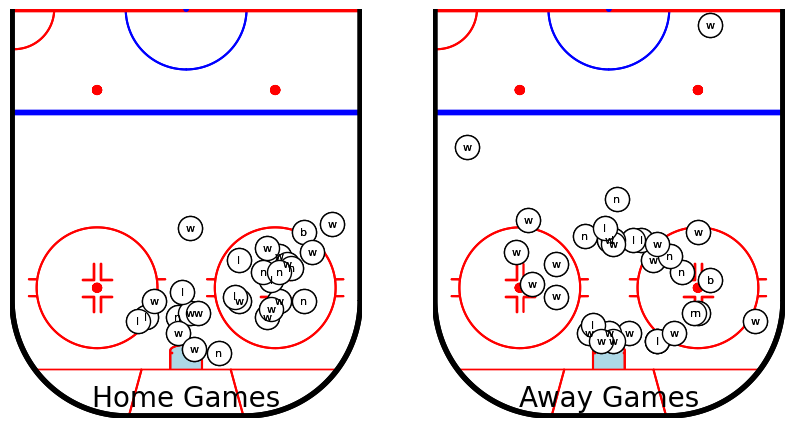

In [42]:
# grid code sourced from https://github.com/the-bucketless/hockey_rink
# raw data sourced from moneypuck.com

home_goals = pasta_goals.assign(
    home=pasta_goals.home == 1,
    x=np.abs(pasta_goals.xCordAdjusted),
    y=pasta_goals.yCordAdjusted * np.sign(pasta_goals.xCordAdjusted),
)

away_goals = pasta_goals.assign(
    away=pasta_goals.home != 1,
    x=np.abs(pasta_goals.xCordAdjusted),
    y=pasta_goals.yCordAdjusted * np.sign(pasta_goals.xCordAdjusted),
)

rink = NHLRink(rotation=270, net={"visible": False})

fig, axs = plt.subplots(1, 2, figsize=(10, 20))

# home
# plt.subplot(1, 2,1)
for ax in axs:
    rink.draw(display_range="half", ax=axs[0])

    rink.scatter(
        "xCordAdjusted",
        "yCordAdjusted",
        ax=axs[0],
        facecolor="white",
        edgecolor="black",
        s=300,
        data=home,
    )

    rink.text(
        "xCordAdjusted",
        "yCordAdjusted",
        pasta_goals["shot"],
        ax=axs[0],
        ha="center",
        va="center",
        fontsize=8,
        data=home,
    )

location_texth = rink.text(
    0.5,
    0.05,
    "Home Games",
    ax=axs[0],
    use_rink_coordinates=False,
    ha="center",
    va="center",
    fontsize=20,
)

# away
# plt.subplot(1, 2,2)
for ax in axs:
    rink.draw(display_range="half", ax=axs[1])

    rink.scatter(
        "xCordAdjusted",
        "yCordAdjusted",
        ax=axs[1],
        facecolor="white",
        edgecolor="black",
        s=300,
        data=away,
    )

    rink.text(
        "xCordAdjusted",
        "yCordAdjusted",
        pasta_goals["shot"],
        ax=axs[1],
        ha="center",
        va="center",
        fontsize=8,
        data=away,
    )

location_text = rink.text(
    0.5,
    0.05,
    "Away Games",
    ax=axs[1],
    use_rink_coordinates=False,
    ha="center",
    va="center",
    fontsize=20,
)

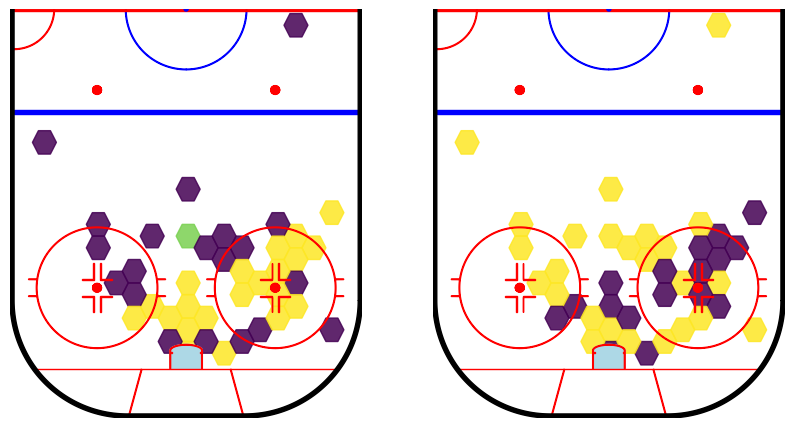

In [60]:
# this oen is good hexmap

home_goals = pasta_goals.assign(
    home=pasta_goals.home == 1,
    x=np.abs(pasta_goals.xCordAdjusted),
    y=pasta_goals.yCordAdjusted * np.sign(pasta_goals.xCordAdjusted),
)


away_goals = pasta_goals.assign(
    away=pasta_goals.home != 1,
    x=np.abs(pasta_goals.xCordAdjusted),
    y=pasta_goals.yCordAdjusted * np.sign(pasta_goals.xCordAdjusted),
)

fig, axs = plt.subplots(1, 2, figsize=(10, 8))

rink = NHLRink(rotation=270, net={"visible": False})

rink.hexbin(
    "x",
    "y",
    "home",
    data=home_goals,
    gridsize=(14, 8),
    plot_range="zone",
    alpha=0.85,
    vmax=0.25,
    ax=axs[0],
    draw_kw={"display_range": "half"},
    zorder=1,
)


rink.hexbin(
    "x",
    "y",
    "away",
    data=away_goals,
    gridsize=(14, 8),
    plot_range="zone",
    alpha=0.85,
    vmax=0.25,
    ax=axs[1],
    draw_kw={"display_range": "half"},
    zorder=1,
)


In [44]:
f = plt.figure(figsize=(94/6,50/6))
ax = f.add_subplot(121)
colors = np.where(pasta_goals['shotType']=='WRIST','r',np.where(pasta_goals['shotType']=='SLAP','b', 'y')
ax = plt.scatter(xCordAdjusted,yCordAdjusted, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Shot Types", fontsize = 15)
plt.xlim(500,950)
plt.ylim(0,500)

SyntaxError: invalid syntax (980493533.py, line 4)

In [ ]:
# Lauko shots
lauko_shots = shot.query("shooterPlayerId == 8480880")
lauko_shots["goal_scored"] = np.where(lauko_shots["event"] == "GOAL", 1, 0)
lauko_shots.head()

In [ ]:
lauko_shots = lauko_shots.sort_values(
    ["game_id", "shotID"], ascending=[True, True]
).reset_index()
lauko_shots.head()

In [ ]:
lauko_shots = lauko_shots.rename(columns={"index": "goal_no"})
lauko_shots["goal_no"] = lauko_shots.index + 1
lauko_shots.head()

In [45]:
# create counting column that identifies rows with a cancel date
cond_list_home = [lauko_shots["isHomeTeam"] == 1.0, lauko_shots["isHomeTeam"] == 0.0]
choice_list_home = [1, 0]

cond_list_away = [lauko_shots["isHomeTeam"] == 0.0, lauko_shots["isHomeTeam"] == 1.0]
choice_list_away = [1, 0]

cond_list_zone = [
    lauko_shots["location"] == "HOMEZONE",
    lauko_shots["location"] != "HOMEZONE",
]
choice_list_zone = [0, 1]

lauko_shots["home"] = np.select(cond_list_home, choice_list_home)
lauko_shots["away"] = np.select(cond_list_away, choice_list_away)
lauko_shots["zone"] = np.select(cond_list_zone, choice_list_zone)
lauko_shots.head()

,goal_no,shotID,arenaAdjustedShotDistance,arenaAdjustedXCord,arenaAdjustedXCordABS,arenaAdjustedYCord,arenaAdjustedYCordAbs,averageRestDifference,awayEmptyNet,awayPenalty1Length,awayPenalty1TimeLeft,awaySkatersOnIce,awayTeamCode,awayTeamGoals,defendingTeamAverageTimeOnIce,defendingTeamAverageTimeOnIceOfDefencemen,defendingTeamAverageTimeOnIceOfDefencemenSinceFaceoff,defendingTeamAverageTimeOnIceOfForwards,defendingTeamAverageTimeOnIceOfForwardsSinceFaceoff,defendingTeamAverageTimeOnIceSinceFaceoff,defendingTeamDefencemenOnIce,defendingTeamForwardsOnIce,defendingTeamMaxTimeOnIce,defendingTeamMaxTimeOnIceOfDefencemen,defendingTeamMaxTimeOnIceOfDefencemenSinceFaceoff,defendingTeamMaxTimeOnIceOfForwards,defendingTeamMaxTimeOnIceOfForwardsSinceFaceoff,defendingTeamMaxTimeOnIceSinceFaceoff,defendingTeamMinTimeOnIce,defendingTeamMinTimeOnIceOfDefencemen,defendingTeamMinTimeOnIceOfDefencemenSinceFaceoff,defendingTeamMinTimeOnIceOfForwards,defendingTeamMinTimeOnIceOfForwardsSinceFaceoff,defendingTeamMinTimeOnIceSinceFaceoff,distanceFromLastEvent,event,game_id,goal,goalieIdForShot,goalieNameForShot,homeEmptyNet,homePenalty1Length,homePenalty1TimeLeft,homeSkatersOnIce,homeTeamCode,homeTeamGoals,homeTeamWon,id,isHomeTeam,isPlayoffGame,...,shootingTeamMaxTimeOnIceOfDefencemen,shootingTeamMaxTimeOnIceOfDefencemenSinceFaceoff,shootingTeamMaxTimeOnIceOfForwards,shootingTeamMaxTimeOnIceOfForwardsSinceFaceoff,shootingTeamMaxTimeOnIceSinceFaceoff,shootingTeamMinTimeOnIce,shootingTeamMinTimeOnIceOfDefencemen,shootingTeamMinTimeOnIceOfDefencemenSinceFaceoff,shootingTeamMinTimeOnIceOfForwards,shootingTeamMinTimeOnIceOfForwardsSinceFaceoff,shootingTeamMinTimeOnIceSinceFaceoff,shotAngle,shotAngleAdjusted,shotAnglePlusRebound,shotAnglePlusReboundSpeed,shotAngleReboundRoyalRoad,shotDistance,shotGeneratedRebound,shotGoalieFroze,shotOnEmptyNet,shotPlayContinuedInZone,shotPlayContinuedOutsideZone,shotPlayStopped,shotRebound,shotRush,shotType,shotWasOnGoal,speedFromLastEvent,team,teamCode,time,timeDifferenceSinceChange,timeSinceFaceoff,timeSinceLastEvent,timeUntilNextEvent,xCord,xCordAdjusted,xFroze,xGoal,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xRebound,xShotWasOnGoal,yCord,yCordAdjusted,goal_scored,home,away,zone
0,1,2294,15.000000,-79,79,-11,11,-8.5,0,0,0,5,ARI,1,20.0,13.0,13.0,21.750000,21.750000,20.0,1,4,24,13,13,24,24,24,13,13,13,19,19,13,147.648231,SHOT,20027,0,8478872,Karel Vejmelka,0,120,12,4,BOS,2,1,193,1,0,...,6,6,22,22,22,5,5,5,13,13,5,49.763642,49.763642,49.763642,1.715988,0,17.029386,0,0,0,0,1,0,0,0,WRIST,1,5.091318,HOME,BOS,1905,-8,88,29,63,-78,78,0.084538,0.073488,0.247345,0.532176,0.024014,0.038440,0.765964,-13,13,0,1,0,1
1,2,2317,9.000000,80,80,1,1,3.4,0,0,0,5,ARI,3,25.6,29.0,29.0,23.333333,23.333333,25.6,2,3,29,29,29,29,29,29,12,29,29,12,12,12,172.568827,SHOT,20027,0,8478872,Karel Vejmelka,0,0,0,5,BOS,3,1,261,1,0,...,29,29,79,29,29,29,29,29,29,29,29,5.194429,5.194429,0.000000,0.000000,0,11.045361,1,0,0,0,0,0,0,0,TIP,1,15.688075,HOME,BOS,2771,17,29,11,2,78,78,0.121377,0.183745,0.372542,0.245409,0.021114,0.055812,0.767390,1,1,0,1,0,1
2,3,2318,7.071068,82,82,-1,1,3.4,0,0,0,5,ARI,3,27.6,31.0,31.0,25.333333,25.333333,27.6,2,3,31,31,31,31,31,31,14,31,31,14,14,14,4.472136,SHOT,20027,0,8478872,Karel Vejmelka,0,0,0,5,BOS,3,1,262,1,0,...,31,31,81,31,31,31,31,31,31,31,31,-8.130102,8.130102,13.324531,6.662266,1,7.071068,0,1,0,0,0,0,1,0,BACK,1,2.236068,HOME,BOS,2773,17,31,2,0,82,82,0.219007,0.290318,0.225954,0.156468,0.031575,0.076678,0.948122,-1,-1,0,1,0,1
3,4,4216,31.000000,79,79,-29,29,-18.8,0,0,0,5,BOS,3,39.8,48.0,48.0,34.333333,34.333333,39.8,2,3,55,55,55,54,54,55,4,41,41,4,4,4,128.471787,SHOT,20049,0,8476341,Anton Forsberg,0,0,0,5,OTT,6,1,217,0,0,...,5,5,43,43,43,4,4,4,26,26,4,-71.565051,71.565051,0.000000,0.000000,0,31.622777,1,0,0,0,0,0,0,0,SLAP,1,42.823929,AWAY,BOS,2273,0,84,3,2,79,79,0.185299,0.041942,0.382424,0.320433,0.026565,0.043337,0.781658,-30,-30,0,0,1,0
4,5,6373,27.000000,62,62,3,3,1.0,0,0,0,5,MIN,1,24.0,25.5,25.5

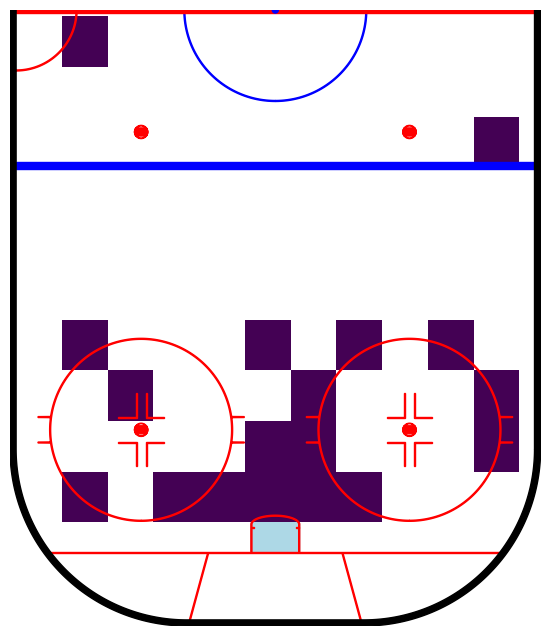

In [46]:
fig, axs = plt.subplots(1, figsize=(18, 8))

rink = NHLRink(rotation=270, net={"visible": False})

rink.heatmap(
    "xCordAdjusted",
    "yCordAdjusted",
    data=lauko_shots,
    draw_kw={"display_range": "half"},
)

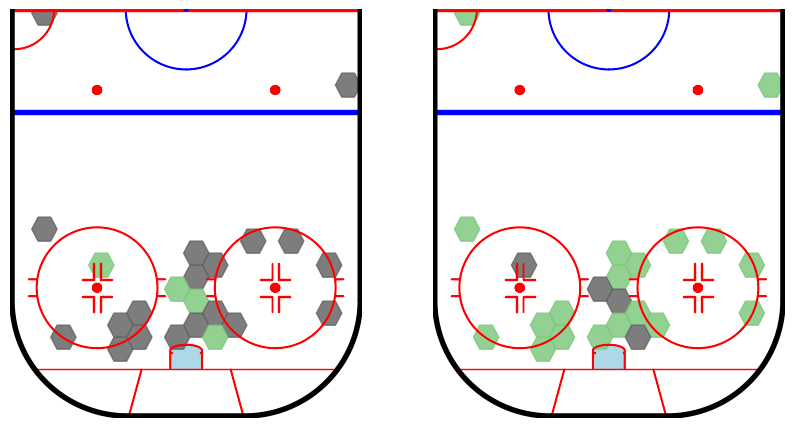

In [67]:
shots = lauko_shots.assign(
    shots=lauko_shots.goal_scored == 0,
    x=np.abs(lauko_shots.xCordAdjusted),
    y=lauko_shots.yCordAdjusted * np.sign(lauko_shots.xCordAdjusted),
)


goals = lauko_shots.assign(
    goals=lauko_shots.goal_scored != 0,
    x=np.abs(lauko_shots.xCordAdjusted),
    y=lauko_shots.yCordAdjusted * np.sign(lauko_shots.xCordAdjusted),
)

fig, axs = plt.subplots(1, 2, figsize=(10, 8))

rink = NHLRink(rotation=270, net={"visible": False})

rink.hexbin(
    "x",
    "y",
    "shots",
    data=shots,
    gridsize=(14, 8),
    plot_range="zone",
    alpha=0.85,
    vmax=0.25,
    ax=axs[0],
    draw_kw={"display_range": "half"},
    cmap="Accent",
)


rink.hexbin(
    "x",
    "y",
    "goals",
    data=goals,
    gridsize=(14, 8),
    plot_range="zone",
    alpha=0.85,
    vmax=0.25,
    ax=axs[1],
    draw_kw={"display_range": "half"},
    cmap="Accent",
)


In [21]:
lauko_shots.query("goal_scored==1")

,shotID,arenaAdjustedShotDistance,arenaAdjustedXCord,arenaAdjustedXCordABS,arenaAdjustedYCord,arenaAdjustedYCordAbs,averageRestDifference,awayEmptyNet,awayPenalty1Length,awayPenalty1TimeLeft,awaySkatersOnIce,awayTeamCode,awayTeamGoals,defendingTeamAverageTimeOnIce,defendingTeamAverageTimeOnIceOfDefencemen,defendingTeamAverageTimeOnIceOfDefencemenSinceFaceoff,defendingTeamAverageTimeOnIceOfForwards,defendingTeamAverageTimeOnIceOfForwardsSinceFaceoff,defendingTeamAverageTimeOnIceSinceFaceoff,defendingTeamDefencemenOnIce,defendingTeamForwardsOnIce,defendingTeamMaxTimeOnIce,defendingTeamMaxTimeOnIceOfDefencemen,defendingTeamMaxTimeOnIceOfDefencemenSinceFaceoff,defendingTeamMaxTimeOnIceOfForwards,defendingTeamMaxTimeOnIceOfForwardsSinceFaceoff,defendingTeamMaxTimeOnIceSinceFaceoff,defendingTeamMinTimeOnIce,defendingTeamMinTimeOnIceOfDefencemen,defendingTeamMinTimeOnIceOfDefencemenSinceFaceoff,defendingTeamMinTimeOnIceOfForwards,defendingTeamMinTimeOnIceOfForwardsSinceFaceoff,defendingTeamMinTimeOnIceSinceFaceoff,distanceFromLastEvent,event,game_id,goal,goalieIdForShot,goalieNameForShot,homeEmptyNet,homePenalty1Length,homePenalty1TimeLeft,homeSkatersOnIce,homeTeamCode,homeTeamGoals,homeTeamWon,id,isHomeTeam,isPlayoffGame,lastEventCategory,...,shootingTeamDefencemenOnIce,shootingTeamForwardsOnIce,shootingTeamMaxTimeOnIce,shootingTeamMaxTimeOnIceOfDefencemen,shootingTeamMaxTimeOnIceOfDefencemenSinceFaceoff,shootingTeamMaxTimeOnIceOfForwards,shootingTeamMaxTimeOnIceOfForwardsSinceFaceoff,shootingTeamMaxTimeOnIceSinceFaceoff,shootingTeamMinTimeOnIce,shootingTeamMinTimeOnIceOfDefencemen,shootingTeamMinTimeOnIceOfDefencemenSinceFaceoff,shootingTeamMinTimeOnIceOfForwards,shootingTeamMinTimeOnIceOfForwardsSinceFaceoff,shootingTeamMinTimeOnIceSinceFaceoff,shotAngle,shotAngleAdjusted,shotAnglePlusRebound,shotAnglePlusReboundSpeed,shotAngleReboundRoyalRoad,shotDistance,shotGeneratedRebound,shotGoalieFroze,shotOnEmptyNet,shotPlayContinuedInZone,shotPlayContinuedOutsideZone,shotPlayStopped,shotRebound,shotRush,shotType,shotWasOnGoal,speedFromLastEvent,team,teamCode,time,timeDifferenceSinceChange,timeSinceFaceoff,timeSinceLastEvent,timeUntilNextEvent,xCord,xCordAdjusted,xFroze,xGoal,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xRebound,xShotWasOnGoal,yCord,yCordAdjusted,goal_scored
13019,13019,9.433981,-84,84,-8,8,-12.0,0,0,0,5,BOS,1,27.0,42.5,42.5,16.666667,16.666667,27.0,2,3,66,66,66,21,21,66,13,19,19,13,13,13,121.807225,GOAL,20147,1,8477465,Tristan Jarry,0,0,0,5,PIT,1,0,100,0,0,MISS,...,2,3,29,6,6,29,29,29,4,4,4,18,18,4,57.994617,57.994617,0.000000,0.000000,0,9.433981,0,0,0,0,0,0,0,0,WRIST,1,15.225903,AWAY,BOS,800,-9,157,8,0,-84,84,0.137510,0.089339,0.391900,0.271915,0.023731,0.085605,0.845210,-8,8,1
84712,84712,18.000000,-71,71,1,1,-1.8,0,0,0,5,BUF,0,40.4,40.5,40.5,40.333333,40.333333,40.4,2,3,51,51,51,42,42,51,30,30,30,38,38,30,40.496913,GOAL,20974,1,8480045,Ukko-Pekka Luukkonen,0,0,0,5,BOS,1,1,191,1,0,SHOT,...,2,3,40,40,40,39,39,40,36,40,40,36,36,36,-2.862405,2.862405,46.055844,23.027922,0,20.024984,0,0,0,0,0,0,1,0,WRIST,1,20.248457,HOME,BOS,2007,6,86,2,0,-69,69,0.175328,0.313633,0.227320,0.180071,0.024614,0.079033,0.858595,1,-1,1
84751,84751,11.000000,78,78,2,2,-12.8,0,0,0,5,BUF,1,37.2,54.0,54.0,26.000000,26.000000,37.2,2,3,66,66,66,42,42,66,12,42,42,12,12,12,6.708204,GOAL,20974,1,8480045,Ukko-Pekka Luukkonen,0,0,0,5,BOS,6,1,318,1,0,SHOT,...,2,3,44,44,44,42,42,44,7,7,7,14,14,7,8.130102,8.130102,21.370622,21.370622,1,14.142136,0,0,0,0,0,0,1,0,SNAP,1,6.708204,HOME,BOS,3548,-5,125,0,0,75,75,0.252890,0.435892,0.088204,0.049064,0.099111,0.074839,0.952698,2,2,1
101226,101226,36.000000,-60,60,21,21,6.8,0,0,0,5,BOS,2,16.4,10.5,10.5,20.333333,20.333333,16.4,2,3,24,11,11,24,24,24,10,10,10,18,18,10,50.089919,GOAL,21166,1,8475883,Frederik Andersen,0,0,0,5,CAR,1,0,163,0,0,GIVE,...,2,3,26,26,26,25,25,26,19,19,19,21,21,19,-35.537678,35.537678,0.000000,0.000000,0,34.409301,0,0,0,0,0,0,0,0,WRIST,1,1.669664,AWAY,BOS,1906,9,70,30,0,-61,61,0.20